# OpenAPS IOB Calculations
----
The code in this notebook will replicate and visualize the IOB calculations used in the [OpenAPS project](https://github.com/openaps/oref0).

Specifically, it will replicate the javascript code found in [`OpenAPS/oref0/lib/iob/calculation.js`](https://github.com/openaps/oref0/blob/master/lib/iob/calculate.js) and plot insulin action curves for a set of Duration of Insulin Activity (`dia`) values.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Coefficients used in estimating the percent of insulin remaining, or (alternatively) the insulin action/decay curve.
# Coeff[0] = alpha * 1
# Coeff[1] = beta1 * x^2
# Coeff[2] = beta2 * x
insulin_action_coeffs = [[1.000000, -0.001852, 0.001852],   # Applied between [0,peak)
                         [0.555560, 0.001323, -0.054233]]   # Applied between [peak,end)

In [17]:
def calc_IOB(dia):
    
    # Default to 3 hour Duration of Insulin Activity (dia), 
    # but scale peak and end for longer (or shorter) dia values
    dia_scaler = dia / 3.0
    peak = 75 * dia_scaler
    end = 180 * dia_scaler
    
    iob = {} 
    
    for i_min in range(0, int(end)):
    
        if (i_min < peak):
            x = (i_min / 5) + 1
            iob_pct = insulin_action_coeffs[0][0] + insulin_action_coeffs[0][1] * x**2 + insulin_action_coeffs[0][2] * x
        elif (i_min < end):
            y = (i_min - peak) / 5
            iob_pct = insulin_action_coeffs[1][0] + insulin_action_coeffs[1][1] * y**2 + insulin_action_coeffs[1][2] * y
        elif (i_min >= end):
            iob_pct = 0
    
        iob.update({i_min: iob_pct})
    
    return iob   

In [18]:
iob_dia3 = calc_IOB(3)

In [28]:
 iob_df = pd.DataFrame(list(iob_dia3.items())) 

In [36]:
iob_df.columns=("min", "iob_pct")
iob_df.head()

,min,iob_pct
0,0,1.000000
1,1,0.999556
2,2,0.998963
3,3,0.998222
4,4,0.997333


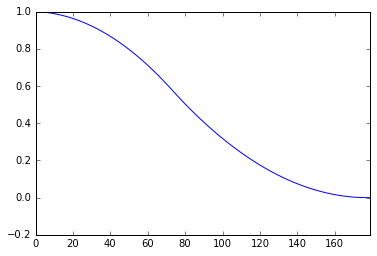

In [38]:
my_plot = iob_df['iob_pct'].plot(kind='line')